# Read and plot file CSV data

In [4]:
import numpy as np
from datetime import datetime, timezone
import pandas as pd
import ephem
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
excel_path = "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/GrapeCompairFlightData.xlsx"

In [6]:
df = pd.read_excel(excel_path, header=0, skiprows=[1])

# Display the DataFrame (optional)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Time                  2264 non-null   datetime64[ns]
 1   MKS High Sensor:           2264 non-null   float64       
 2   MKS Mid Sensor:            2264 non-null   float64       
 3   MKS Low Sensor:            2264 non-null   float64       
 4   MKS High Sensor Altitude:  2264 non-null   float64       
 5   MKS Mid  Sensor Altitude:  2264 non-null   float64       
 6   MKS Low  Sensor Altitude:  1161 non-null   float64       
 7   MKS Hi:                    2264 non-null   int64         
 8   MKS Mid:                   2264 non-null   int64         
 9   MKS Lo:                    2264 non-null   int64         
 10  GPS Altitude:              2264 non-null   float64       
 11  GPS Velocity UP:           2264 non-null   int64         
 12  GPS St

## Data Cleaning

In [7]:
df['datetime'] = pd.to_datetime(df['Date Time'], format='%Y-%m-%d %H:%M:%S')
df['altitude'] = pd.to_numeric( df['GPS Altitude:'], errors='coerce')
df['epoch_dt'] = df['datetime'].astype(int) // 10**9

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Time                  2264 non-null   datetime64[ns]
 1   MKS High Sensor:           2264 non-null   float64       
 2   MKS Mid Sensor:            2264 non-null   float64       
 3   MKS Low Sensor:            2264 non-null   float64       
 4   MKS High Sensor Altitude:  2264 non-null   float64       
 5   MKS Mid  Sensor Altitude:  2264 non-null   float64       
 6   MKS Low  Sensor Altitude:  1161 non-null   float64       
 7   MKS Hi:                    2264 non-null   int64         
 8   MKS Mid:                   2264 non-null   int64         
 9   MKS Lo:                    2264 non-null   int64         
 10  GPS Altitude:              2264 non-null   float64       
 11  GPS Velocity UP:           2264 non-null   int64         
 12  GPS St

# Use 5kft altitude to get time.

In [9]:
sel_df = df[df['altitude']>5000]

In [10]:
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 497 to 2263
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Time                  1767 non-null   datetime64[ns]
 1   MKS High Sensor:           1767 non-null   float64       
 2   MKS Mid Sensor:            1767 non-null   float64       
 3   MKS Low Sensor:            1767 non-null   float64       
 4   MKS High Sensor Altitude:  1767 non-null   float64       
 5   MKS Mid  Sensor Altitude:  1767 non-null   float64       
 6   MKS Low  Sensor Altitude:  664 non-null    float64       
 7   MKS Hi:                    1767 non-null   int64         
 8   MKS Mid:                   1767 non-null   int64         
 9   MKS Lo:                    1767 non-null   int64         
 10  GPS Altitude:              1767 non-null   float64       
 11  GPS Velocity UP:           1767 non-null   int64         
 12  GPS 

In [11]:
sel_df['datetime'].min(), sel_df['epoch_dt'].min()

(Timestamp('2023-08-27 15:07:07'), 1693148827)

In [138]:
df.datetime[0:5]

0   2023-08-27 11:37:57
1   2023-08-27 11:38:09
2   2023-08-27 11:38:21
3   2023-08-27 11:38:33
4   2023-08-27 11:38:45
Name: datetime, dtype: datetime64[ns]

In [54]:


y2 = sel_df['GPS Day:']

In [55]:
x = df['GPS Altitude:'].values
x= x[1:]
x = x.astype(float)

In [56]:
y1 = sel_df['GPS Time:'].values
y1 = y1[1:]
y1 = y1.astype(float)

<Axes: xlabel='datetime', ylabel='altitude'>

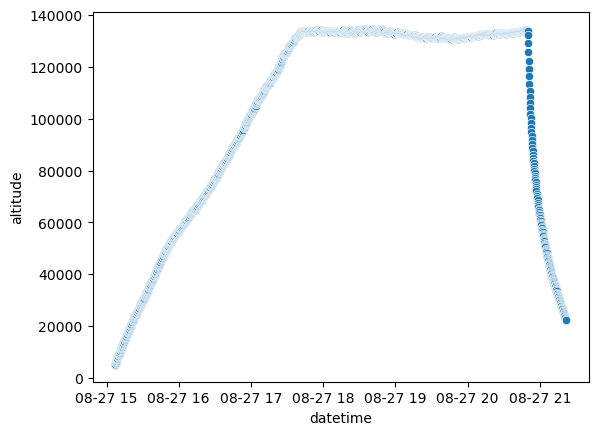

In [122]:
sns.scatterplot(x=sel_df['datetime'],y=sel_df['altitude'])
# plt.ylim(4000,4200)

In [85]:
df['epoch_time'] =  (df['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Time                  2264 non-null   datetime64[ns]
 1   MKS High Sensor:           2264 non-null   float64       
 2   MKS Mid Sensor:            2264 non-null   float64       
 3   MKS Low Sensor:            2264 non-null   float64       
 4   MKS High Sensor Altitude:  2264 non-null   float64       
 5   MKS Mid  Sensor Altitude:  2264 non-null   float64       
 6   MKS Low  Sensor Altitude:  1161 non-null   float64       
 7   MKS Hi:                    2264 non-null   int64         
 8   MKS Mid:                   2264 non-null   int64         
 9   MKS Lo:                    2264 non-null   int64         
 10  GPS Altitude:              2264 non-null   float64       
 11  GPS Velocity UP:           2264 non-null   int64         
 12  GPS St

In [87]:
df['epoch_time']

0       1693136277
1       1693136289
2       1693136301
3       1693136313
4       1693136325
           ...    
2259    1693171258
2260    1693171270
2261    1693171283
2262    1693171295
2263    1693171307
Name: epoch_time, Length: 2264, dtype: int64

## Now we have :

converted datetime(UTC) to epoch time, We have altitude so we will extrapolate them next

# Extrapolate

In [88]:
from scipy.interpolate import interp1d

In [90]:
interp_function = interp1d(df['epoch_time'], df['altitude'], kind='linear', fill_value="extrapolate", bound_error=True)

In [92]:
help(interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string or as an integer
 |      specifying the order of the spline interpolator to use.
 |      The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
 |      'slinear', 'quadra

In [102]:

# Creating a sample DataFrame
data = {'A': [1, 5, 10, 15, 20], 'B': [2, 12, 10, 16, 22]}
df = pd.DataFrame(data)

# Using linear interpolation with bounds_error=False to avoid errors for extrapolation
interp_function = interp1d(df['A'], df['B'], kind='linear', fill_value='extrapolate', bounds_error=False)

# Specifying a desired_A value for interpolation
desired_A = 7.5

# Using the interpolation function to obtain the corresponding B value
desired_B = interp_function(desired_A)

print(desired_B)

11.0


<Axes: >

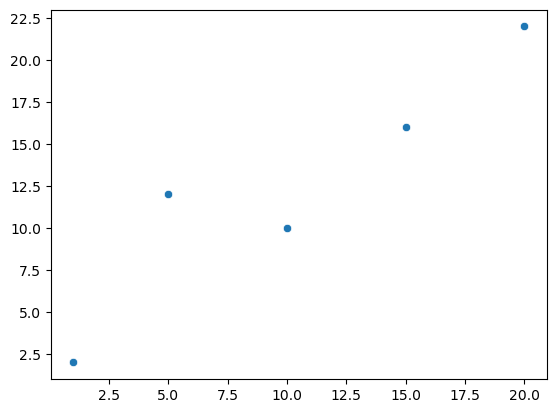

In [104]:
sns.scatterplot(x =data['A'], y=data['B'])